In [345]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# read .dat to a list of lists
file = "/Users/yyk_lab/Downloads/txtfiles/Cl_B_firstchain_stepthru_roughly_same_step_figdata.csv"
peaks= [i.strip().split() for i in open(file).readlines()]

#Take care of fact that last water is left out 

if file[34:36] =='O4':
    chan = 'O4'
    chain =file[37:43]
    st = [19,20, 48, 49, 50 ,51 ,52, 53, 71 , 72 ,73] # O4 
    appendme = 'W%d_W%d_0,' %(st[-1], st[-1]), '%s' %(peaks[-1][1])
    peaks.append(appendme)

elif file[34:38] =='Cl_A':
    chan = 'Cl_A'
    chain =file[39:44]
    st= [25,23,24,62,61, 22, 21,40,41, 42, 150, 119, 117, 121, 122,   125 ] # Cl A 
    appendme = 'W%d_W%d_0,' %(st[-1], st[-1]), '%s' %(peaks[-1][1])
    peaks.append(appendme)
elif file[34:38] =='Cl_B':
    chain =file[39:44]
    chan =  'Cl_B'
    st = [59, 60, 66 , 67 ,68, 69 ,70 ] # Cl B
    appendme = 'W%d_W%d_0,' %(st[-1], st[-1]), '%s' %(peaks[-1][1])
    peaks.append(appendme)
elif file[34:38] =='O1_A':   
    chain =file[39:45]
    chan =  'O1_A'
    st= [103,104,105,106,107] # O1 A 
    appendme = 'W%d_W%d_0,' %(st[-1], st[-1]), '%s' %(peaks[-1][1])
    peaks.append(appendme)
else: 
    chain =file[39:45]
    chan =  'O1_B'
    st= [27, 26, 28,30, 29, 39, 32,31, 33, 151, 35,76, 34,77, 38, 37, 36,  101, 102] # O1 B 
    appendme = 'W%d_W%d_0,' %(st[-1], st[-1]), '%s' %(peaks[-1][1])
    peaks.append(appendme)
peaks

[['W59_W60_0,', '3.72'],
 ['W59_W60_1,', '3.70'],
 ['W59_W60_2,', '3.66'],
 ['W59_W60_3,', '3.55'],
 ['W59_W60_4,', '3.34'],
 ['W59_W60_5,', '2.97'],
 ['W59_W60_6,', '2.58'],
 ['W59_W60_7,', '2.21'],
 ['W59_W60_8,', '1.84'],
 ['W59_W60_9,', '1.45'],
 ['W59_W60_10,', '1.08'],
 ['W59_W60_11,', '0.74'],
 ['W59_W60_12,', '0.45'],
 ['W59_W60_13,', '0.21'],
 ['W59_W60_14,', '0.00'],
 ['W59_W60_15,', '-0.16'],
 ['W59_W60_16,', '-0.28'],
 ['W59_W60_17,', '-0.27'],
 ['W59_W60_18,', '-0.14'],
 ['W59_W60_19,', '0.04'],
 ['W59_W60_20,', '0.24'],
 ['W59_W60_21,', '0.46'],
 ['W59_W60_22,', '0.71'],
 ['W59_W60_23,', '0.95'],
 ['W60_W66_0,', '1.17'],
 ['W60_W66_1,', '1.15'],
 ['W60_W66_2,', '1.12'],
 ['W60_W66_3,', '1.07'],
 ['W60_W66_4,', '1.02'],
 ['W60_W66_5,', '0.92'],
 ['W60_W66_6,', '0.75'],
 ['W60_W66_7,', '0.55'],
 ['W60_W66_8,', '0.33'],
 ['W60_W66_9,', '0.09'],
 ['W60_W66_10,', '-0.17'],
 ['W60_W66_11,', '-0.40'],
 ['W60_W66_12,', '-0.60'],
 ['W60_W66_13,', '-0.81'],
 ['W60_W66_14,', '-1.01'

In [346]:
gro_path = '/Users/yyk_lab/Downloads/0F.pdb_fittedto55all.pdb'

colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]


names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

reference = pd.read_fwf(gro_path, names=names_pdb, colspecs=colspecs_pdb, skiprows=4)
ref2=reference[(reference['resname']=='OOO')]
df=ref2
df

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
16552,HETATM,16547.0,O,NaN,OOO,G,1.0,NaN,65.040,58.188,50.009,1.00,24.85,O,NaN
16553,HETATM,16548.0,O,NaN,OOO,G,2.0,NaN,19.655,54.694,51.414,1.00,35.38,O,NaN
16554,HETATM,16549.0,O,NaN,OOO,G,3.0,NaN,41.234,28.788,37.875,1.00,24.88,O,NaN
16555,HETATM,16550.0,O,NaN,OOO,G,4.0,NaN,34.385,54.734,27.038,1.00,28.43,O,NaN
16556,HETATM,16551.0,O,NaN,OOO,G,5.0,NaN,96.070,66.291,58.316,1.00,36.18,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,HETATM,43099.0,O,NaN,OOO,g,136.0,NaN,57.162,-11.375,30.860,1.00,25.35,O,NaN
43125,HETATM,43100.0,O,NaN,OOO,g,137.0,NaN,57.999,-9.217,28.423,1.00,25.65,O,NaN
43126,HETATM,43101.0,O,NaN,OOO,g,138.0,NaN,49.000,-11.404,28.794,1.00,26.49,O,NaN
43127,HETATM,43102.0,O,NaN,OOO,g,141.0,NaN,32.509,-7.885,43.087,1.00,35.09,O,NaN


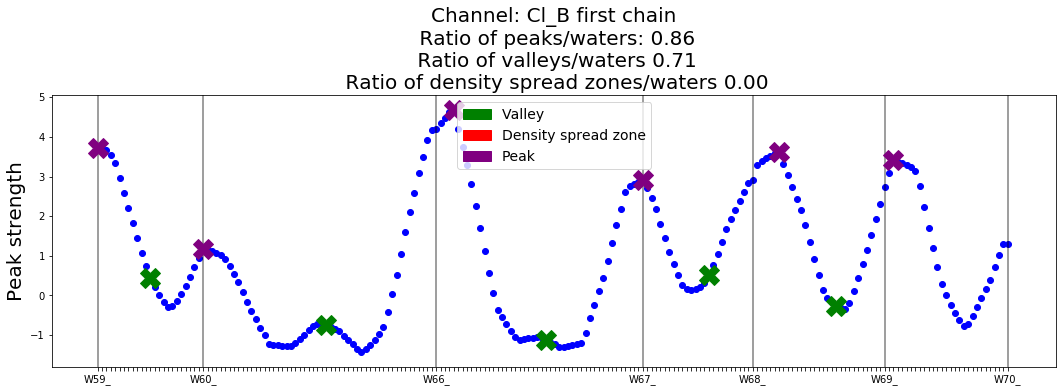

In [347]:
hide=[]
show=[]
identity=[]
peakz = []
fig = plt.figure(figsize=[18,5])
ax = fig.add_subplot(111)
from scipy.signal import find_peaks
import matplotlib.patches as mpatches

z=0
for x in peaks:
    plt.scatter(z,float(x[1]),color='blue')
    peakz.append(float(x[1]))
#     print(x[0][-3:])
    if  (x[0][-3:]) == '_0,' :
        
        identity.append((x[0][0:4]))
        show.append(z)
    else:
        identity.append(0)
        hide.append(z)
    z=z+1
plt.xticks(np.arange(0,len(identity),1))
ax.set_xticklabels(np.array(identity))

xticks = ax.xaxis.get_major_ticks()
for i in hide:
    xticks[i].label1.set_visible(False)
for p in show:
    plt.axvline(x=p, color='black', alpha = 0.5)
lol=peakz
peaksh, _ = find_peaks(lol[0:len(lol)-2], height=0)
peaksh=list(peaksh)
# for i in peaksh:
#     relevant = 0
#     for p in range(1,len(show)):
#         if p==len(show)-1:
           
#             if ((show[p] - (show[p]-show[p-1])/3) <=i ):
#                 relevant +=1
#         else:
#             if ((show[p] - (show[p]-show[p-1])/3) <=i <=(show[p] + (show[p+1]-show[p])/3)):
#                 relevant +=1
#     if relevant ==0:
#         peaksh=list(peaksh)
#         peaksh.remove(i)

peaksh.insert(0,0) # account for no hump on first water

valleyz=[]

highzone=[]

for i in range(1,len(peaksh)): 
    diff = abs(peaksh[i] -peaksh[i-1])
    mid = int(diff / 2)
    if lol[mid+peaksh[i-1]] < 1:
        valleyz.append(mid+peaksh[i-1])
    else:
        highzone.append(mid+peaksh[i-1])

        
plt.plot(valleyz, np.array(lol)[valleyz], 'X', color='green', markersize=20)
plt.plot(highzone, np.array(lol)[highzone], 'X', color='red', markersize=20)
plt.plot(peaksh, np.array(lol)[peaksh], "X",color='purple',  markersize=20)
ratpeak = (len(peaksh)) / (len(show))
ratval = (len(valleyz)) / (len(show))
rathigh = (len(highzone)) / (len(show))
ratmed= (len(medzone)) / (len(show))

green_patch = mpatches.Patch(color='green', label='Valley')
red_patch = mpatches.Patch(color='red', label='Density spread zone')
purple_patch = mpatches.Patch(color='purple', label='Peak')
plt.legend(handles=[green_patch,  red_patch,purple_patch], fontsize=14)

plt.title('Channel: %s %s chain\n Ratio of peaks/waters: %0.2f\n Ratio of valleys/waters %0.2f\n Ratio of density spread zones/waters %0.2f' %(chan,chain, ratpeak, ratval, rathigh),fontsize=20 )
plt.ylabel('Peak strength', fontsize=20)
plt.savefig(file + '.jpg', bbox_inches='tight')
plt.show()
